In [1]:
# Book: "An Introduction to Statistical Learning"
# by James, et al.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Get advertising dataset mentioned in Book
# 0th col is just row num
advert_df = pd.read_csv('Advertising.csv', usecols=[1, 2, 3, 4])
advert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# Display several entries
advert_df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
# num samples
len(advert_df.TV)

200

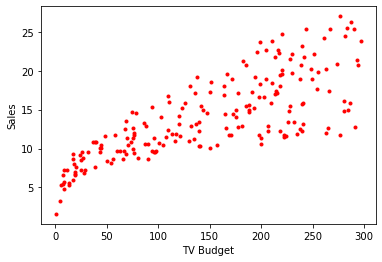

In [5]:
# Show scatter plot
plt.plot(advert_df.TV, advert_df.sales, 'r.')
plt.ylabel('Sales')
plt.xlabel('TV Budget')
plt.show()

In [6]:
# Perform linear regression (ordinary least squares)
#  minimizes coefficients with residual sum of squares
lin_model = sklearn.linear_model.LinearRegression()

In [7]:
x = pd.Series.to_numpy(advert_df.TV).reshape(-1,1)
y = advert_df.sales

In [8]:
lin_model.fit(x, y)

LinearRegression()

In [9]:
# Print linear regression model parameters
beta0 = lin_model.intercept_
beta1 = lin_model.coef_
print('Beta 0: ', beta0)
print('Beta 1: ', beta1)

Beta 0:  7.032593549127693
Beta 1:  [0.04753664]


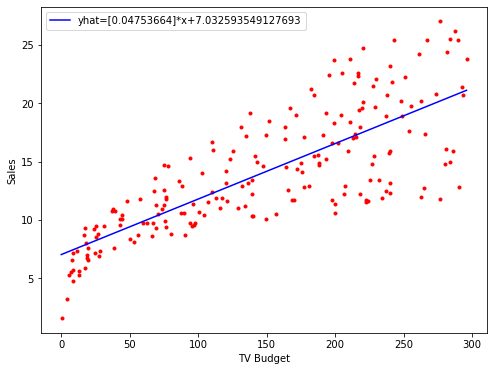

In [10]:
# Plot regression line
fig = plt.figure(num=1, figsize=(8,6))
ax1 = fig.add_subplot()

plt.plot(x, y, 'r.')
yhat = beta1*[i for i in range(0, 1+int(np.max(x)))] + beta0
plt.plot(yhat, 'b', label='yhat={}*x+{}'.format(beta1, beta0))
plt.ylabel('Sales')
plt.xlabel('TV Budget')
plt.legend(loc='best')


fig.savefig('linear_regression_model.png', dpi=100)

plt.show()